# Regular Genomics Project **RNA Localisation**


---

**Problem definition**:

TODO


### **1.** Data Preparation

Firstly, we import several necessary packages and load in our data:

In [1]:
import pandas as pd
import numpy as np
# training, only need for the model initialization to change in general
from models import CNN
from notes.utils import read_model_file
from models.utils import plot_line_graph, box_plot, save_plot, tf_pearson
from sklearn.model_selection import train_test_split
import datetime
import pydot

### **2** |  Initializations

We use as baseline model the [RNATracker](https://github.com/HarveyYan/RNATracker/blob/master/Models/cnn_bilstm_attention.py) model and a CNN model.


Epoch 1/10
311/311 [==============================] - 236s 756ms/step - loss: 0.1985 - accuracy: 0.1793 - tf_pearson: 0.0190 - val_loss: 0.1667 - val_accuracy: 0.1981 - val_tf_pearson: 0.0312
Epoch 2/10
311/311 [==============================] - 233s 750ms/step - loss: 0.1655 - accuracy: 0.2056 - tf_pearson: 0.0218 - val_loss: 0.1657 - val_accuracy: 0.1957 - val_tf_pearson: 0.0311
Epoch 3/10
311/311 [==============================] - 233s 748ms/step - loss: 0.1644 - accuracy: 0.2213 - tf_pearson: 0.0217 - val_loss: 0.1646 - val_accuracy: 0.2077 - val_tf_pearson: 0.0302
Epoch 4/10
311/311 [==============================] - 233s 749ms/step - loss: 0.1635 - accuracy: 0.2269 - tf_pearson: 0.0222 - val_loss: 0.1649 - val_accuracy: 0.2073 - val_tf_pearson: 0.0294
Epoch 5/10
311/311 [==============================] - 234s 753ms/step - loss: 0.1627 - accuracy: 0.2319 - tf_pearson: 0.0236 - val_loss: 0.1642 - val_accuracy: 0.2021 - val_tf_pearson: 0.0319
Epoch 6/10
311/311 [====================

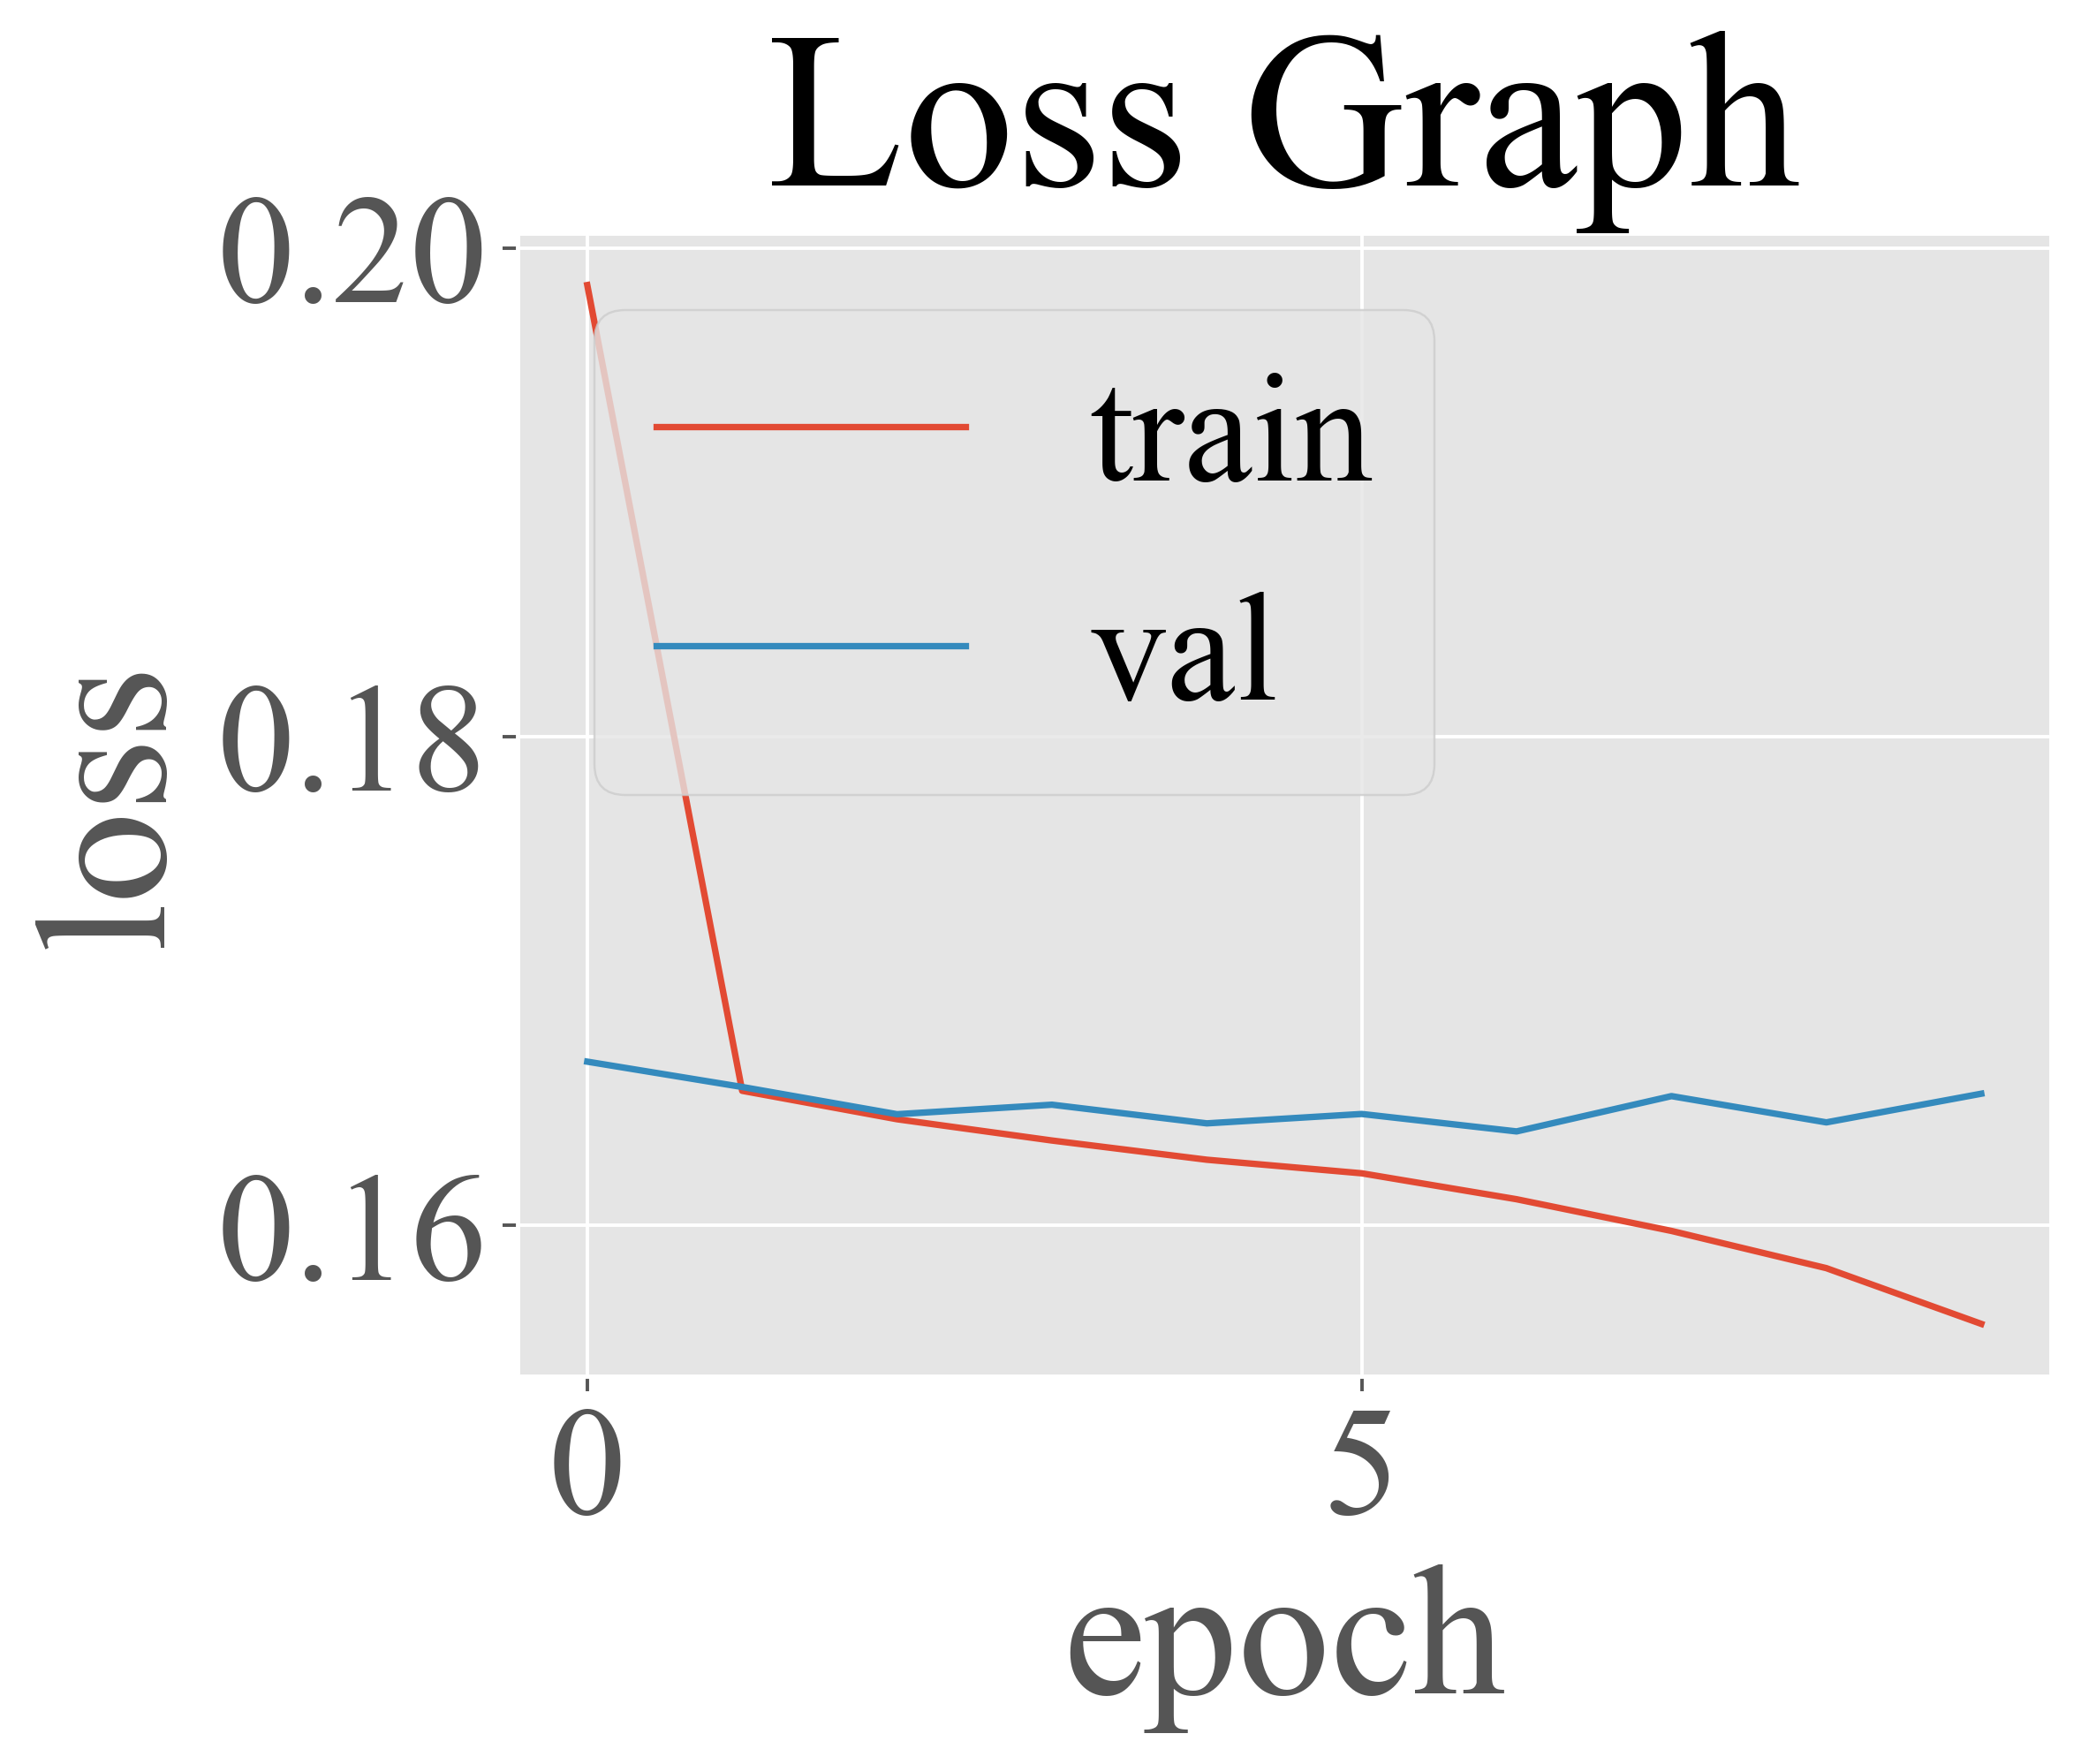

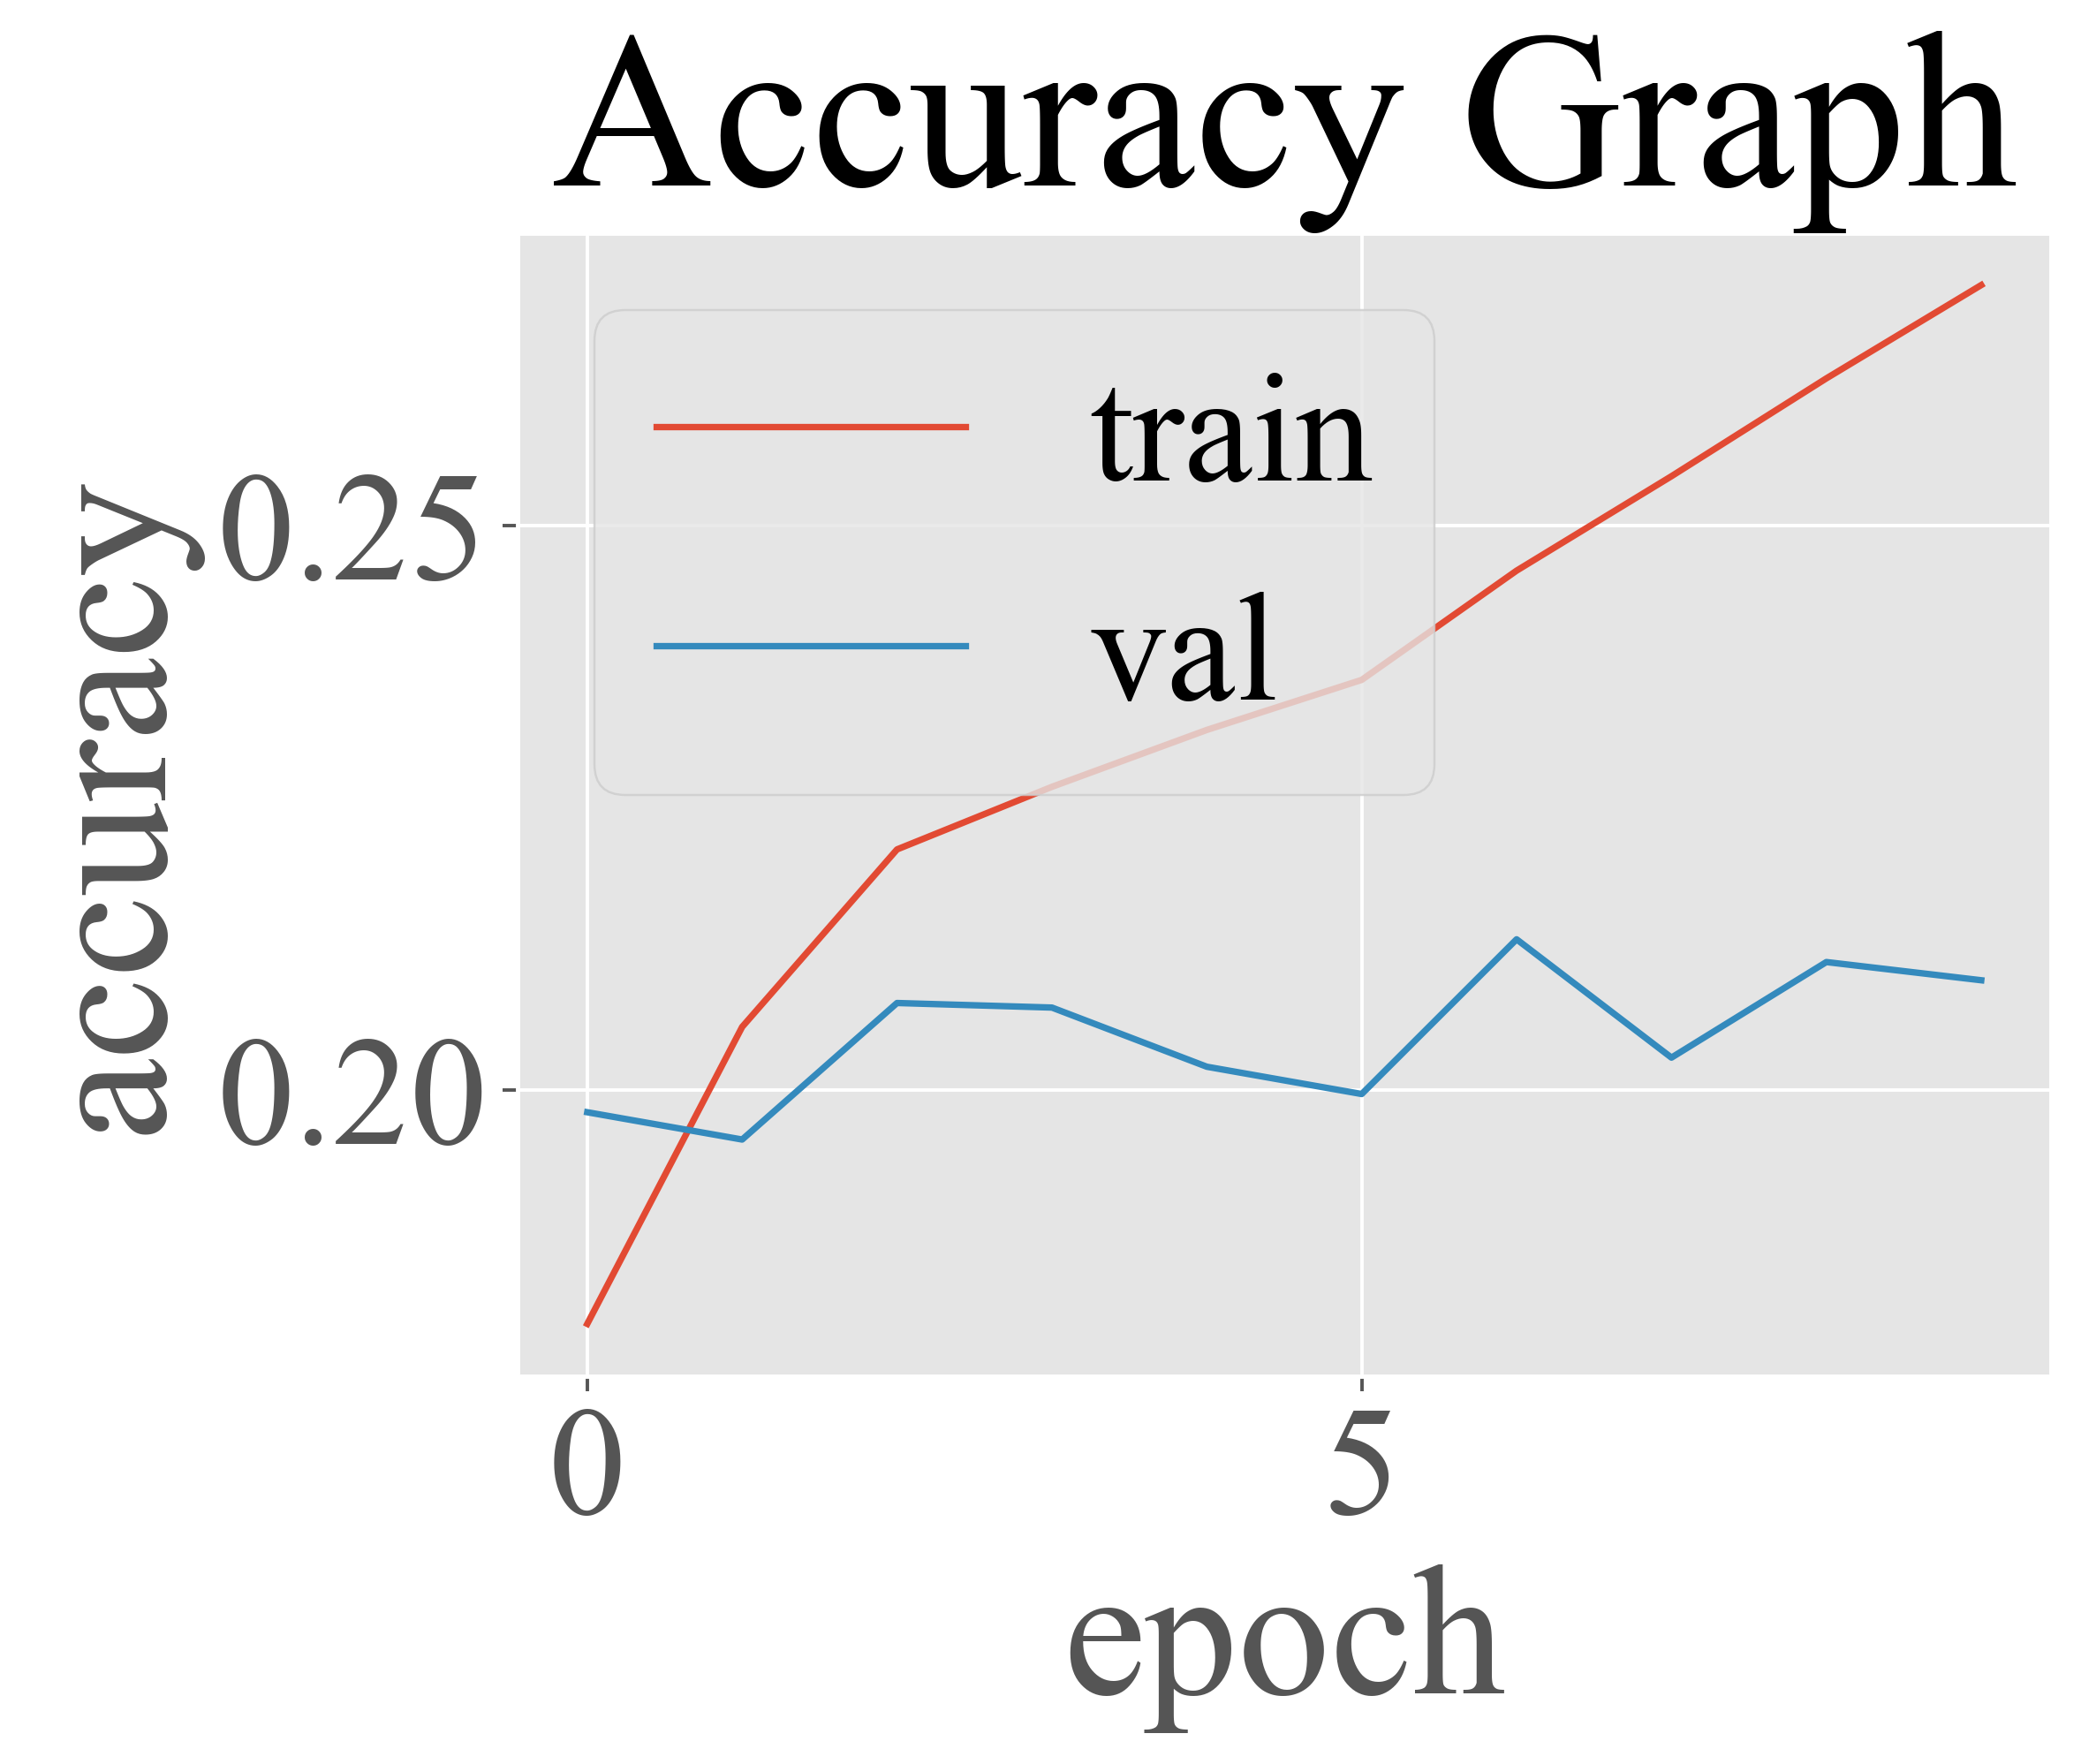

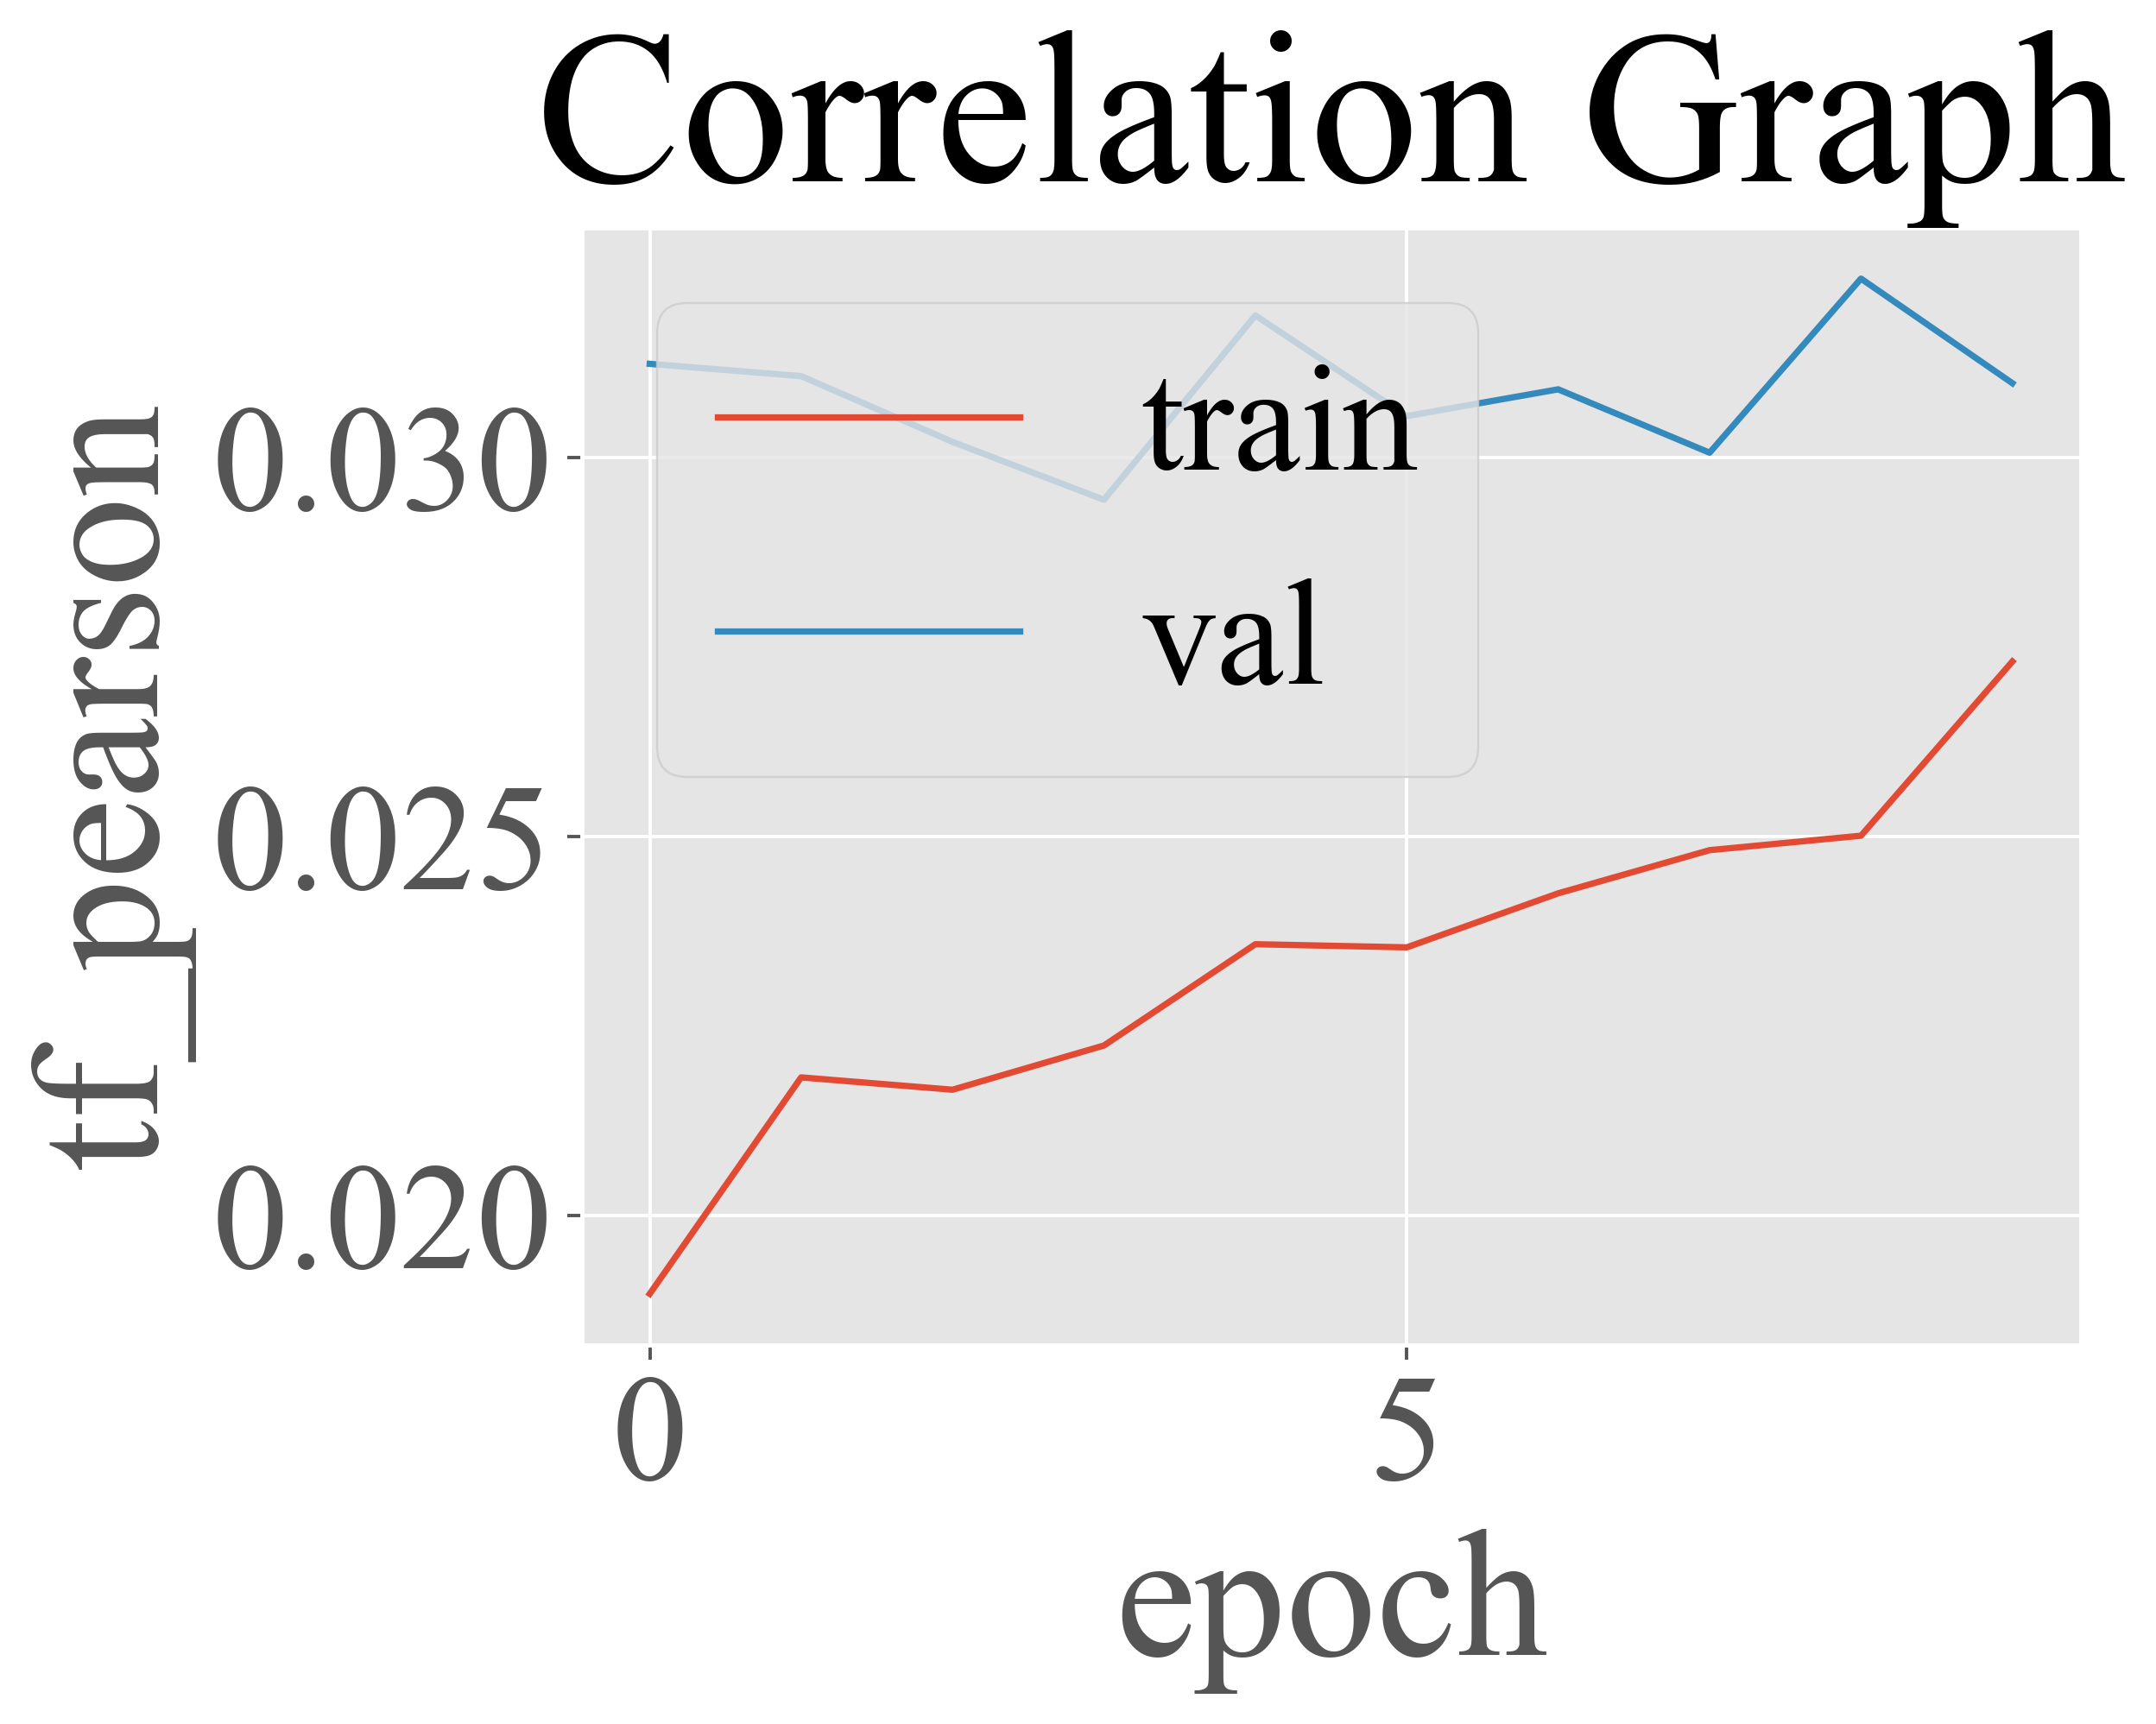

In [7]:
models = ["CNN_architecture1_Iusti.yaml"]
plot_output_paths = ["CNN_architecture1"]
model_architecture_visualizations = ["CNN_architecture1"]
model_outputs = ["CNN_architecture1"]
datasets = ["APEX_SEQ_UPDATED"]

for dataset in datasets:
    np.random.seed(3)
    data_org = pd.read_csv(f'datasets/{dataset}.csv')
    test_data = data_org.sample(frac=0.1)
    train_data = data_org.drop(test_data.index) # TODO: note: we also have to preprocess the test set similary

    # 80/20 split
    train_split, valid_split = train_test_split(train_data, random_state=42, test_size=0.2)

    for i in range(0, len(models)):

        max_seq_len = train_data['seq'].apply(lambda x: len(x)).max()
        # MODEL
        model_path = f"model_architectures/{models[i]}"

        # Path where to save viz
        model_architecture_path = f"model_architecture_viz/{model_architecture_visualizations[i]}.png"

        params_dict = read_model_file(model_path, max_seq_len)
        param_dataLoader_valid = params_dict['param_dataLoader_valid']
        param_dataLoader_train = params_dict['param_dataLoader_train']
        params_model = params_dict['params_model']
        params_train = params_dict['params_train']

        model = CNN(
                    input_size=(max_seq_len, 4),
                    params_model=params_model, metrics=['accuracy', tf_pearson])


        history = model.fit_and_evaluate(train_data=train_split, eval_data=valid_split,
                                         params_train_dataLoader=param_dataLoader_train,
                                         params_eval_dataLoader=param_dataLoader_valid,
                                         params_train=params_train)

        model.print_model(model_architecture_path)

        time_date = datetime.datetime.now().date()

        model_output = f"model_outputs/{model_outputs[i]}_{time_date}.h5"

        model.save_model(model_output)

        # print(history.history)

        plt_data = [history.history['loss'], history.history['val_loss']]
        plot_line_graph(plt_data, "Loss Graph", 'loss', 'epoch', ['train', 'val'])

        # save_plot(f"plots/{dataset}_{plot_output_paths[i]}_loss.png")

        plt_data = [history.history['accuracy'], history.history['val_accuracy']]
        plot_line_graph(plt_data, "Accuracy Graph", 'accuracy', 'epoch', ['train', 'val'])

        # save_plot(f"plots/{dataset}_{plot_output_paths[i]}_acc.png")

        plt_data = [history.history['tf_pearson'], history.history['val_tf_pearson']]
        plot_line_graph(plt_data, "Correlation Graph", 'tf_pearson', 'epoch', ['train', 'val'])


In [ ]:
test_result = model.evaluate(test_data, **param_dataLoader_valid)
result = dict(zip(model.model.metrics_names, test_result))
TEST_ACCURACY = result['accuracy']
TEST_LOSS = result['loss']